In [7]:

import pandas as pd

# Load the data from the provided URL
url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]
data_1_1_actual.columns = data_1_1.iloc[3]
data_1_1_actual.reset_index(drop=True, inplace=True)

# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]

# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']

# Add columns that end with "Total"
columns_to_keep.extend([col for col in west_midlands_data_filtered.columns if col.endswith("Total")])

# Filter the dataset for these columns
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns.to_csv('west_midlands_filtered_columns_2.csv')

west_midlands_filtered_columns
# Load and display the first few rows of the dataset
#data = pd.read_csv('west_midlands_filtered_columns_2.csv')


3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LULUCF Net Emissions,Industry Total,Commercial Total,Public Sector Total,Domestic Total,Transport Total,Agriculture Total,Waste Management Total,Grand Total
2040,West Midlands,Birmingham,Birmingham,E08000025,2005,13.873543,1216.162658,1170.441473,558.70517,2359.376951,1670.971299,15.128539,54.674741,7059.334372
2041,West Midlands,Birmingham,Birmingham,E08000025,2006,13.855886,1199.131422,1168.499559,519.502282,2365.574895,1610.744841,15.762343,59.040806,6952.112034
2042,West Midlands,Birmingham,Birmingham,E08000025,2007,13.477209,1176.697923,1111.410745,492.80575,2283.42429,1621.32779,15.055982,86.322633,6800.522322
2043,West Midlands,Birmingham,Birmingham,E08000025,2008,12.998567,1175.523168,1143.259246,489.438236,2284.490311,1545.527971,14.784999,78.655141,6744.67764
2044,West Midlands,Birmingham,Birmingham,E08000025,2009,12.151837,937.944889,945.363805,423.187511,2062.886425,1497.902337,13.508004,206.792247,6099.737055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,West Midlands,Worcestershire,Wyre Forest,E07000239,2017,-22.99366,81.578795,39.204973,18.44841,154.11273,155.081565,33.125984,40.831584,499.390383
2580,West Midlands,Worcestershire,Wyre Forest,E07000239,2018,-22.677647,99.82282,23.783474,18.025695,149.76546,151.453539,32.343872,37.19314,489.710354
2581,West Midlands,Worcestershire,Wyre Forest,E07000239,2019,-22.823968,84.767255,22.492546,15.106118,144.241608,146.896973,31.772339,36.456934,458.909804
2582,West Midlands,Worcestershire,Wyre Forest,E07000239,2020,-23.150931,75.302885,16.067331,14.061786,141.095909,118.871468,30.189129,36.122034,408.55961


In [8]:
# Load and display the first few rows of the dataset
data = pd.read_csv('west_midlands_filtered_columns_2.csv')

In [9]:
data = data.drop(data.columns[0:6], axis=1)
data

,LULUCF Net Emissions,Industry Total,Commercial Total,Public Sector Total,Domestic Total,Transport Total,Agriculture Total,Waste Management Total,Grand Total
0,13.873543,1216.162658,1170.441473,558.705170,2359.376951,1670.971299,15.128539,54.674741,7059.334372
1,13.855886,1199.131422,1168.499559,519.502282,2365.574895,1610.744841,15.762343,59.040806,6952.112034
2,13.477209,1176.697923,1111.410745,492.805750,2283.424290,1621.327790,15.055982,86.322633,6800.522322
3,12.998567,1175.523168,1143.259246,489.438236,2284.490311,1545.527971,14.784999,78.655141,6744.677640
4,12.151837,937.944889,945.363805,423.187511,2062.886425,1497.902337,13.508004,206.792247,6099.737055
...,...,...,...,...,...,...,...,...,...
505,-22.993660,81.578795,39.204973,18.448410,154.112730,155.081565,33.125984,40.831584,499.390383
506,-22.677647,99.822820,23.783474,18.025695,149.765460,151.453539,32.343872,37.193140,489.710354
507,-22.823968,84.767255,22.492546,15.106118,144.241608,146.896973,31.772339,36.456934,458.909804
508,-23.150931,75.302885,16.067331,14.061786,141.095909,118.871468,30.189129,36.122034,408.559610


In [10]:
#data = data.drop(data.columns[:4], axis=1)
#df = df[df.columns[:-1]]
data = data [data.columns[0:-1]]
data

,LULUCF Net Emissions,Industry Total,Commercial Total,Public Sector Total,Domestic Total,Transport Total,Agriculture Total,Waste Management Total
0,13.873543,1216.162658,1170.441473,558.705170,2359.376951,1670.971299,15.128539,54.674741
1,13.855886,1199.131422,1168.499559,519.502282,2365.574895,1610.744841,15.762343,59.040806
2,13.477209,1176.697923,1111.410745,492.805750,2283.424290,1621.327790,15.055982,86.322633
3,12.998567,1175.523168,1143.259246,489.438236,2284.490311,1545.527971,14.784999,78.655141
4,12.151837,937.944889,945.363805,423.187511,2062.886425,1497.902337,13.508004,206.792247
...,...,...,...,...,...,...,...,...
505,-22.993660,81.578795,39.204973,18.448410,154.112730,155.081565,33.125984,40.831584
506,-22.677647,99.822820,23.783474,18.025695,149.765460,151.453539,32.343872,37.193140
507,-22.823968,84.767255,22.492546,15.106118,144.241608,146.896973,31.772339,36.456934
508,-23.150931,75.302885,16.067331,14.061786,141.095909,118.871468,30.189129,36.122034


In [11]:
data.dtypes

LULUCF Net Emissions      float64
Industry Total            float64
Commercial Total          float64
Public Sector Total       float64
Domestic Total            float64
Transport Total           float64
Agriculture Total         float64
Waste Management Total    float64
dtype: object

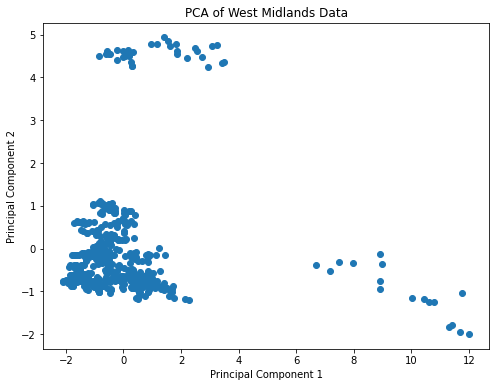

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#data = pd.read_csv('west_midlands_filtered_columns.csv')

numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data 
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data_scaled)

# Convert the principal components to a DataFrame for easier visualization
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of West Midlands Data')
plt.show()



In [20]:
principal_df

,Principal Component 1,Principal Component 2
0,12.001855,-1.995915
1,11.673958,-1.953224
2,11.415244,-1.781735
3,11.305038,-1.842314
4,10.597819,-1.248901
...,...,...
505,-1.555177,-0.139210
506,-1.620862,-0.146450
507,-1.679348,-0.144978
508,-1.767924,-0.149595


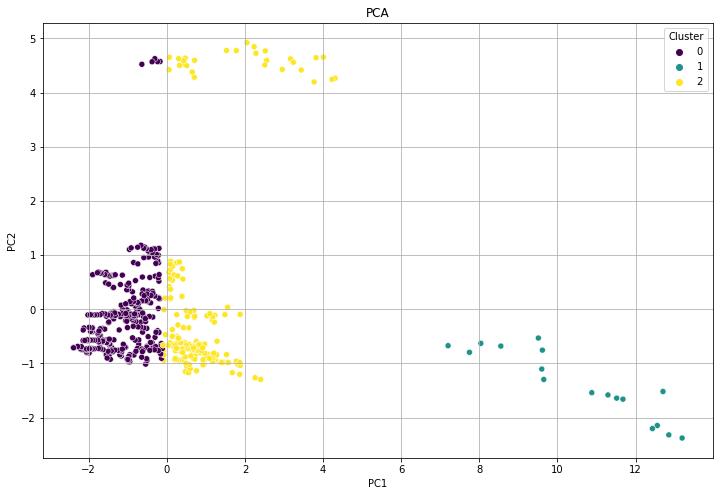

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#perform the KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
principal_df['Cluster'] = kmeans.fit_predict(principal_df[['Principal Component 1','Principal Component 1']])

#plotting the visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=principal_df, legend='full')

#Title and Label
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



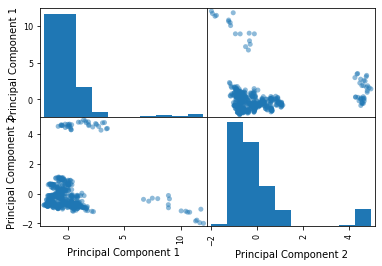

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(principal_df,s=100)
plt.show()


#perform the KMeans
#kmeans = KMeans(n_clusters=3, random_state=0)
#principal_df['Cluster'] = kmeans.fit_predict(principal_df[['Principal Component 1','Principal Component 1']])

#plotting the visualization
#plt.figure(figsize=(12, 8))
#sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=principal_df, legend='full')

#Title and Label
#plt.title('PCA')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.legend(title='Cluster')
#plt.grid(True)
#plt.show()


Text(0, 0.5, 'projection axis 2')

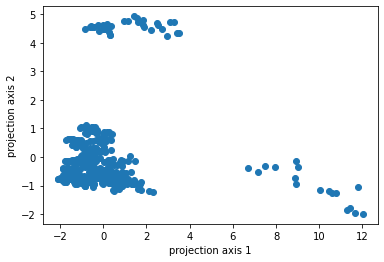

In [16]:
pca= PCA(n_components=2)
X=pca.fit_transform(principal_df)
fig = plt.figure()

plt.scatter(X[:,0], X[:,1])
plt.xlabel('projection axis 1')
plt.ylabel('projection axis 2')

c:\Users\FEMI\anaconda3\anaconda4\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\FEMI\anaconda3\anaconda4\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

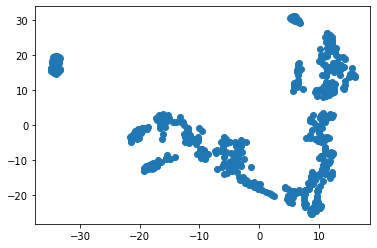

<Figure size 432x288 with 0 Axes>

In [21]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(principal_df)

plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1])
plt.figure()


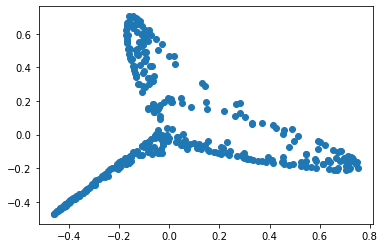

In [24]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=8)
X_kpca = kpca.fit_transform(principal_df)
plt.figure()
plt.scatter(X_kpca[:,0],X_kpca[:,1])

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
X_LDA = clf.fit_transform(principal_df,labs)
plt.figure()
plt.scatter(X_LDA[:,0], X_LDA[:,1])




NameError: name 'labs' is not defined

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extracting the 'Grand Total' column
series = data['Grand Total'].values.reshape(-1, 1)

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(series) * 0.8)
train, test = series[0:train_size], series[train_size:len(series)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

scaled_train[:5], scaled_test[:5]


(array([[1.        ],
        [0.98424432],
        [0.96196912],
        [0.95376308],
        [0.85899294]]),
 array([[0.10324605],
        [0.10462509],
        [0.11172233],
        [0.10469583],
        [0.09716215]]))

In [23]:
def create_dataset(dataset, n_steps=1):
    """
    Convert a time series dataset into a supervised learning dataset.
    """
    dataX, dataY = [], []
    for i in range(len(dataset) - n_steps):
        dataX.append(dataset[i:(i + n_steps), 0])
        dataY.append(dataset[i + n_steps, 0])
    return np.array(dataX), np.array(dataY)

import numpy as np

# Number of previous time steps to use as input features
n_steps = 3

# Transform the train and test datasets into supervised learning datasets
X_train, y_train = create_dataset(scaled_train, n_steps)
X_test, y_test = create_dataset(scaled_test, n_steps)

X_train[:5], y_train[:5]


(array([[1.        , 0.98424432, 0.96196912],
        [0.98424432, 0.96196912, 0.95376308],
        [0.96196912, 0.95376308, 0.85899294],
        [0.95376308, 0.85899294, 0.90499629],
        [0.85899294, 0.90499629, 0.81581644]]),
 array([0.95376308, 0.85899294, 0.90499629, 0.81581644, 0.85827451]))

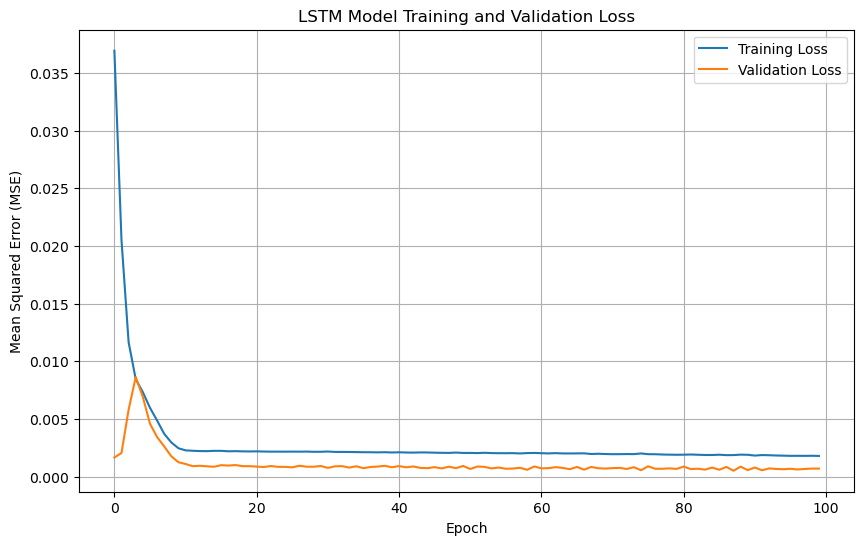

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Reshape the input data to [samples, time_steps, features]
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, verbose=0, validation_data=(X_test_reshaped, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


Using the provided loss values for both training and validation, we can plot them to visualize the model's training process. This will help us understand how the model performed over the epochs.

From the plot, we can observe that:
- The training loss steadily decreases, indicating that the model is learning and fitting to the training data.
- The validation loss decreases initially but then exhibits some fluctuations. This indicates that while the model is generalizing well to the test data in the beginning, there might be some overfitting happening in the later epochs.



In [25]:
predicted_values = model.predict(X_test_reshaped)

4/4 [==============================] - 0s 3ms/step


In [26]:
# Predict the test data
y_pred = model.predict(X_test_reshaped)

# Invert the scaling of the predictions and the test data
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the MAE
mae = np.mean(np.abs(y_test_inv - y_pred_inv))
print(f'Mean Absolute Error: {mae:.2f}')


4/4 [==============================] - 0s 2ms/step
Mean Absolute Error: 142.51


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def compute_metrics(actual, predicted):

    # Mean Squared Error
    mse = mean_squared_error(actual, predicted)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = mean_absolute_error(actual, predicted)
    
    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    return mse, rmse, mae, mape


compute_metrics

# 1. Predict using the trained model on the test data
y_pred = model.predict(X_test_reshaped)

# 2. Inverse scale the predicted and actual values
predicted_values_original_scale = scaler.inverse_transform(y_pred)
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1))


# 3. Compute metrics using the provided `compute_metrics` function
mse, rmse, mae, mape = compute_metrics(y_test_original_scale, predicted_values_original_scale)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


4/4 [==============================] - 0s 3ms/step
MSE: 31989.90920031973
RMSE: 178.8572313335967
MAE: 142.51186616964068
MAPE: 23.07488087409924%


A brief interpretation:

- MSE (Mean Squared Error): \(29967.17\) - On average, each squared difference between the predicted and actual values is about 29967.17. This metric gives more weight to larger errors.
  
- RMSE (Root Mean Squared Error): \(173.11\) - This gives a sense of the magnitude of the error in the same unit as the output. It's useful for understanding the size of the errors the model typically makes.
  
- MAE (Mean Absolute Error): \(131.89\) - On average, the absolute difference between the predicted and actual values is about 131.89. This gives a linear penalty to errors.
  
- MAPE (Mean Absolute Percentage Error): \(18.44\%\) - On average, the model's predictions are off by about 18.44% from the actual values.

These metrics provide insights into how well the LSTM model is performing.

In [28]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [30]:
import optuna
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def objective(trial):
    # Hyperparameters to be tuned
    lstm_units = trial.suggest_int('lstm_units', 10, 100)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64])
    
    model = Sequential()
    model.add(LSTM(units=lstm_units, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    
    history = model.fit(X_train_reshaped, y_train, batch_size=batch_size, epochs=50, validation_data=(X_test_reshaped, y_test), verbose=0)
    
    # Use validation loss as the metric to optimize
    val_loss = history.history['val_loss'][-1]
    return val_loss

    


In [14]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [15]:
import tensorflow as tf
import optuna

study = optuna.create_study(direction='minimize')  # 
study.optimize(objective, n_trials=50)  # 

print('Best hyperparameters: ', study.best_params)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')


[I 2023-09-25 15:21:02,038] A new study created in memory with name: no-name-92822764-3e8c-42a3-bd4b-0a28509aa928
C:\Users\Olajide\AppData\Local\Temp\ipykernel_23372\3200027950.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[W 2023-09-25 15:21:02,307] Trial 0 failed with parameters: {'lstm_units': 83, 'dropout_rate': 0.28295970202185294, 'learning_rate': 0.004639765841936397, 'batch_size': 8} because of the following error: NameError("name 'keras' is not defined").
Traceback (most recent call last):
  File "c:\Users\Olajide\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Olajide\AppData\Local\Temp\ipykernel_23372\3200027950.py", line 17, in objective
    model.compile(opti

NameError: name 'keras' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import optuna

# ... (rest of the code remains the same)
study = optuna.create_study(direction='minimize')  # We want to minimize the validation loss
study.optimize(objective, n_trials=50)  # You can increase n_trials for a more exhaustive search

print('Best hyperparameters: ', study.best_params)

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')


[I 2023-09-24 19:51:27,981] A new study created in memory with name: no-name-2366b016-e760-41c8-9566-412900f17358


NameError: name 'objective' is not defined

In [ ]:
sbs.scores_


[-5.528539172180587e-25,
 -260.1671313709845,
 -563.5381828968258,
 -1779.9297595867192,
 -3531.878518301704,
 -28680.459134682278,
 -90310.05375761939,
 -185240.5590616559]